## Import libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pickle
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

## Load dataset

In [3]:
df = pd.read_csv("product.csv")

In [4]:
df.head(10)

,Product_ID,Category,Current_Price,Competitor_Price,Units_Sold,Customer_Satisfaction,Elasticity_Score,Marketing_Spend,Customer_Segment,Season
0,P001,Electronics,241.55,148.01,481.0,1.9,-1.95,3555.74,Midrange,Fall
1,P002,Apparel,295.55,39.62,626.0,1.6,-0.02,7922.68,Budget,Summer
2,P003,Home,421.17,489.75,990.0,1.3,-0.19,2013.39,Premium,Summer
3,P004,Toys,11.44,364.11,705.0,3.0,-1.41,9607.84,Premium,Fall
4,P005,Beauty,230.03,12.23,548.0,3.3,-0.31,1527.47,Budget,Spring
5,P006,Electronics,294.62,374.91,143.0,2.9,-0.55,8059.98,Midrange,Spring
6,P007,Apparel,382.00,443.20,551.0,2.7,-1.71,1426.53,Budget,Winter
7,P008,Home,40.03,362.30,900.0,2.0,-2.30,1949.64,Premium,Winter
8,P009,Toys,313.61,336.39,691.0,1.9,-2.53,1142.80,Premium,Fall
9,P010,Beauty,404.20,91.46,436.0,4.4,-2.47,8064.04,Midrange,Fall


## Exploratory Data Analysis

In [5]:
df.dtypes

Product_ID                object
Category                  object
Current_Price            float64
Competitor_Price         float64
Units_Sold               float64
Customer_Satisfaction    float64
Elasticity_Score         float64
Marketing_Spend          float64
Customer_Segment          object
Season                    object
dtype: object

In [6]:
df.Customer_Satisfaction

0      1.9
1      1.6
2      1.3
3      3.0
4      3.3
      ... 
96     2.7
97     1.2
98     1.2
99     3.1
100    NaN
Name: Customer_Satisfaction, Length: 101, dtype: float64

In [7]:
df.Elasticity_Score

0     -1.95
1     -0.02
2     -0.19
3     -1.41
4     -0.31
       ... 
96    -1.70
97    -0.92
98    -2.23
99    -1.54
100     NaN
Name: Elasticity_Score, Length: 101, dtype: float64

In [8]:
df.Competitor_Price	

0      148.01
1       39.62
2      489.75
3      364.11
4       12.23
        ...  
96     418.35
97     336.35
98      77.38
99     266.74
100       NaN
Name: Competitor_Price, Length: 101, dtype: float64

In [9]:
df.sum

<bound method DataFrame.sum of     Product_ID     Category  Current_Price  Competitor_Price  Units_Sold  \
0         P001  Electronics         241.55            148.01       481.0   
1         P002      Apparel         295.55             39.62       626.0   
2         P003         Home         421.17            489.75       990.0   
3         P004         Toys          11.44            364.11       705.0   
4         P005       Beauty         230.03             12.23       548.0   
..         ...          ...            ...               ...         ...   
96        P097      Apparel         113.37            418.35       978.0   
97        P098         Home          59.34            336.35       209.0   
98        P099         Toys         361.47             77.38       234.0   
99        P100       Beauty         449.12            266.74       934.0   
100        ...          NaN            NaN               NaN         NaN   

     Customer_Satisfaction  Elasticity_Score  Marketing_

In [10]:
df.min

<bound method DataFrame.min of     Product_ID     Category  Current_Price  Competitor_Price  Units_Sold  \
0         P001  Electronics         241.55            148.01       481.0   
1         P002      Apparel         295.55             39.62       626.0   
2         P003         Home         421.17            489.75       990.0   
3         P004         Toys          11.44            364.11       705.0   
4         P005       Beauty         230.03             12.23       548.0   
..         ...          ...            ...               ...         ...   
96        P097      Apparel         113.37            418.35       978.0   
97        P098         Home          59.34            336.35       209.0   
98        P099         Toys         361.47             77.38       234.0   
99        P100       Beauty         449.12            266.74       934.0   
100        ...          NaN            NaN               NaN         NaN   

     Customer_Satisfaction  Elasticity_Score  Marketing_

In [11]:
df.isnull

<bound method DataFrame.isnull of     Product_ID     Category  Current_Price  Competitor_Price  Units_Sold  \
0         P001  Electronics         241.55            148.01       481.0   
1         P002      Apparel         295.55             39.62       626.0   
2         P003         Home         421.17            489.75       990.0   
3         P004         Toys          11.44            364.11       705.0   
4         P005       Beauty         230.03             12.23       548.0   
..         ...          ...            ...               ...         ...   
96        P097      Apparel         113.37            418.35       978.0   
97        P098         Home          59.34            336.35       209.0   
98        P099         Toys         361.47             77.38       234.0   
99        P100       Beauty         449.12            266.74       934.0   
100        ...          NaN            NaN               NaN         NaN   

     Customer_Satisfaction  Elasticity_Score  Marketi

<Axes: ylabel='Count'>

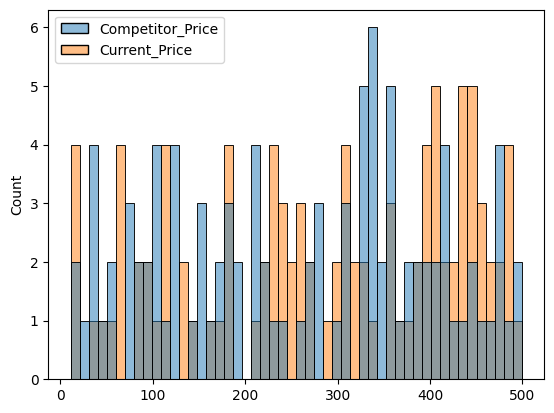

In [12]:
sns.histplot([df.Competitor_Price, df.Current_Price], bins=50)

<Axes: xlabel='Units_Sold', ylabel='Count'>

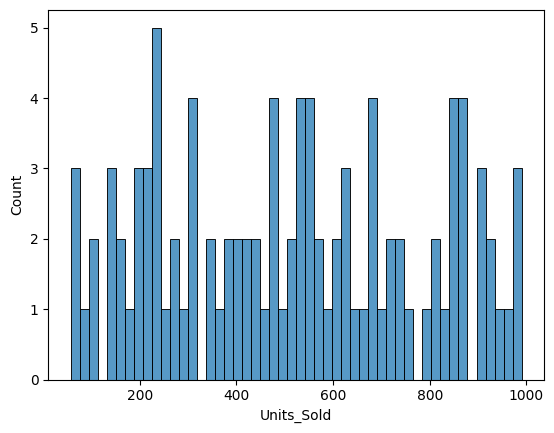

In [13]:
sns.histplot(df.Units_Sold, bins=50)

# Preprocessing: Remove rows with missing target

In [14]:
df = df.dropna(subset=["Units_Sold"])

# Define features and target

In [15]:
X = df.drop("Units_Sold", axis=1)
y = df["Units_Sold"]

#  Identify column types

In [16]:
numeric_features = ["Current_Price", "Competitor_Price", "Customer_Satisfaction", "Elasticity_Score", "Marketing_Spend"]
categorical_features = ["Category", "Customer_Segment", "Season"]

# Preprocessing pipeline

In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

# Create model pipeline

In [18]:
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Train/test split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model

In [20]:
model_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Current_Price',
                                                   'Competitor_Price',
                                                   'Customer_Satisfaction',
                                                   'Elasticity_Score',
                                                   'Marketing_Spend']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Category',
                                                   'Customer_Segment',
                                                   'Season'])])),
                ('regressor', LinearRegression())])

In [21]:
print("Model trained successfully.")

Model trained successfully.


# Evaluate model

In [22]:
y_pred = model_pipeline.predict(x_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("Validation RMSE:", rmse)


Validation RMSE: 320.03661082841313


### Manually compute RMSE

In [23]:
#rmse = np.sqrt(mean_squared_error(y_val, val_preds))
#print("Validation RMSE:", rmse)

#  Save model

In [24]:
joblib.dump(model_pipeline, "model_pipeline.pkl")
print("Model saved to model_pipeline.pkl")

Model saved to model_pipeline.pkl


#  Save expected features for later use

In [33]:
expected_features = model_pipeline.named_steps["preprocessor"].get_feature_names_out()
pd.Series(expected_features).to_csv("expected_features.csv", index=False)

In [34]:
print("Expected features saved to expected_features.csv")

Expected features saved to expected_features.csv


#### Load model and test on new input

In [27]:
model_pipeline = joblib.load("model_pipeline.pkl")
expected = pd.read_csv("expected_features.csv", header=None)[0]

 #### New input example

In [28]:
new_input = {
    "Current_Price": 150,
    "Competitor_Price": 145,
    "Customer_Satisfaction": 8,
    "Elasticity_Score": 0.7,
    "Marketing_Spend": 10000,
    "Category": "Electronics",
    "Customer_Segment": "Premium",
    "Season": "Summer"
}

#### Convert new input to DataFrame

In [29]:
new_input_df = pd.DataFrame([new_input])

#### Predict directly with the pipeline

In [30]:
predicted_units = model_pipeline.predict(new_input_df)

#### Predict on new input

In [32]:
print("Predicted Units Sold:", predicted_units[0])

Predicted Units Sold: 424.46088089125124
